In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 기술통계 - Python
### Python 1.1 기술통계(1)
score = pd.read_csv("C:/data/score.csv")

In [9]:
score.head()

,id,gender,midterm,final
0,13001,f,60,80
1,13003,m,90,72
2,13013,m,76,85
3,13020,f,74,89
4,13041,f,50,53


In [11]:
score.shape

(89, 4)

In [12]:
score["total"] = score.midterm + score["final"]

In [13]:
score.head(3)

,id,gender,midterm,final,total
0,13001,f,60,80,140
1,13003,m,90,72,162
2,13013,m,76,85,161


In [20]:
score["total"].mean()

122.65168539325843

In [21]:
score["total"].std()

37.882324111407364

In [22]:
score["total"].median()

128.0

In [36]:
score["total"].quantile(0.75)

154.0

In [25]:
### Python 1.2 기술통계 (2)
score = pd.read_csv("C:/data/score.csv")

In [26]:
score["total"] = score["midterm"] + score.final

In [27]:
score.head(3)

,id,gender,midterm,final,total
0,13001,f,60,80,140
1,13003,m,90,72,162
2,13013,m,76,85,161


In [28]:
import collections    # 

In [29]:
collections.Counter(score["gender"])

Counter({'f': 35, 'm': 54})

In [30]:
cols = ["midterm", "final", "total"]

In [32]:
score2 = score[cols]

In [33]:
score2.head(3)

,midterm,final,total
0,60,80,140
1,90,72,162
2,76,85,161


In [34]:
type(score2)

pandas.core.frame.DataFrame

In [35]:
score2.describe()

,midterm,final,total
count,89.000000,89.000000,89.000000
mean,66.898876,55.752809,122.651685
std,19.060338,24.088040,37.882324
min,22.000000,0.000000,35.000000
25%,52.000000,40.000000,99.000000
50%,71.000000,55.000000,128.000000
75%,82.000000,75.000000,154.000000
max,100.000000,93.000000,193.000000


In [37]:
score22 = score.iloc[:, 2:5]

In [38]:
score22.head(3)

,midterm,final,total
0,60,80,140
1,90,72,162
2,76,85,161


In [39]:
from scipy.stats import skew
skew(score2)

array([-0.40363253, -0.5141206 , -0.45632558])

In [40]:
from scipy.stats import kurtosis
kurtosis(score2)

array([-0.60237839, -0.4553289 , -0.64057126])

In [41]:
# 그룹별 기술통계 - Python
### Python 2.1 그룹별 기술통계(1)

import pandas as pd

score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

In [42]:
gstat = score.groupby("gender")["total"].describe()

In [44]:
gstat

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
f,35.0,122.771429,34.295503,35.0,102.5,122.0,152.0,172.0
m,54.0,122.574074,40.351101,36.0,91.5,133.0,156.5,193.0


In [45]:
gstat.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of         count        mean        std   min    25%    50%    75%    max
gender                                                                
f        35.0  122.771429  34.295503  35.0  102.5  122.0  152.0  172.0
m        54.0  122.574074  40.351101  36.0   91.5  133.0  156.5  193.0>

In [46]:
gstat["mean"]

gender
f    122.771429
m    122.574074
Name: mean, dtype: float64

In [47]:
gstat["std"]

gender
f    34.295503
m    40.351101
Name: std, dtype: float64

In [48]:
gstat["25%"]

gender
f    102.5
m     91.5
Name: 25%, dtype: float64

In [52]:
gstat["50%"]

gender
f    122.0
m    133.0
Name: 50%, dtype: float64

In [54]:
gstat["75%"]

gender
f    152.0
m    156.5
Name: 75%, dtype: float64

In [58]:
### 그룹별 기술통계(2)

import pandas as pd

score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

In [59]:
gstat_total = score.groupby("gender")["total"]

In [60]:
gstat_total.head(3)

0    140
1    162
2    161
3    163
4    103
5    150
Name: total, dtype: int64

In [63]:
# groupby로 정의된 total 변수를 agg 함수를 통해 그룹별 통계량을 DF로 저장
gstat_total.agg(["size", "mean", "std", "min", "max"])

,size,mean,std,min,max
gender,,,,,
f,35,122.771429,34.295503,35,172
m,54,122.574074,40.351101,36,193


In [64]:
gresult = gstat_total.agg(["size", "mean", "std", "min", "max"])

In [66]:
# groupby 함수와 agg 함수를 통해 gender 변수값을 기준으로 
# 그룹으로 저장된 total 변수값 중 f 값의 그룹별 통계량을 추출 
gresult.loc["f"]

size     35.000000
mean    122.771429
std      34.295503
min      35.000000
max     172.000000
Name: f, dtype: float64

In [68]:
gresult.loc["m"]

size     54.000000
mean    122.574074
std      40.351101
min      36.000000
max     193.000000
Name: m, dtype: float64

In [69]:
type(gresult.loc["m"])

pandas.core.series.Series

In [70]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [71]:
### Python 2.3 그룹별 기술통계 : researchpy 모듈 이용

import researchpy as rp
import pandas as pd

In [72]:
score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

In [73]:
rp.summary_cont(score["total"])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total,89.0,122.6517,37.8823,4.0155,114.6717,130.6317


In [74]:
rp.summary_cont(score.groupby("gender")["total"])

,N,Mean,SD,SE,95% Conf.,Interval
gender,,,,,,
f,35,122.7714,34.2955,5.7970,110.9905,134.5523
m,54,122.5741,40.3511,5.4911,111.5603,133.5878


In [77]:
a = rp.summary_cont(score.groupby("gender")["total"])
a["Mean"]

gender
f    122.7714
m    122.5741
Name: Mean, dtype: float64

In [82]:
### Python 3.1 줄기-잎 그림

In [84]:
pip install stemgraphic

Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import stemgraphic

In [86]:
score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

(<Figure size 540x360 with 1 Axes>, <Axes:>)

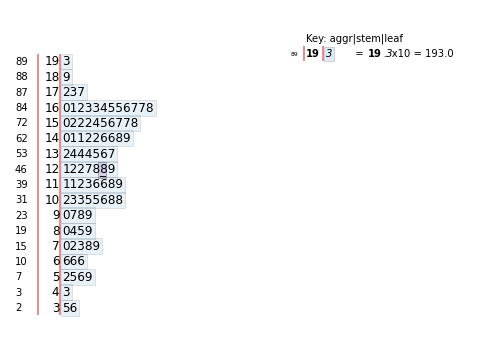

In [87]:
stemgraphic.stem_graphic(score.total, scale=10)

In [88]:
### Python 3.2 상자그림

import seaborn as sns
import pandas as pd

In [89]:
score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

<AxesSubplot:ylabel='total'>

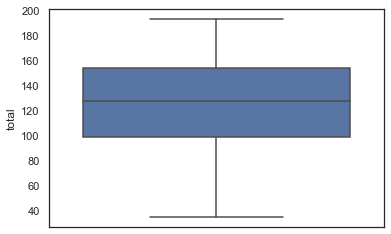

In [102]:
sns.set_style("white")
sns.boxplot(y="total", data=score)

<AxesSubplot:xlabel='total'>

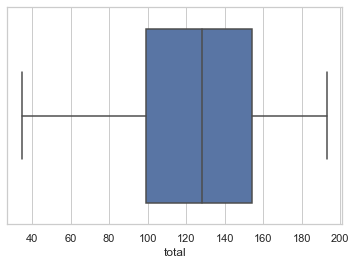

In [103]:
sns.set(style="whitegrid")
sns.boxplot(x="total", data=score)

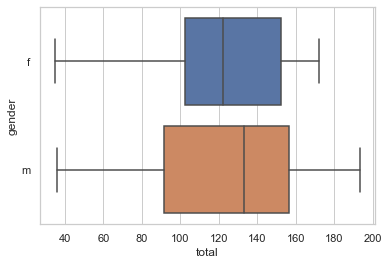

In [105]:
scorebox2 = sns.boxplot(x="total", y="gender", data=score)

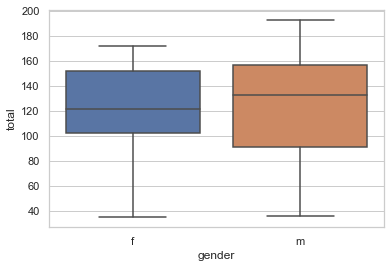

In [106]:
scorebox = sns.boxplot(x="gender", y="total", data=score)

In [107]:
### Python 3.3 히스토그램

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
score = pd.read_csv("C:/data/score.csv")
score["total"] = score.midterm + score["final"]

(array([ 3.,  7.,  6.,  6., 13., 11., 12., 16., 13.,  2.]),
 array([ 35. ,  50.8,  66.6,  82.4,  98.2, 114. , 129.8, 145.6, 161.4,
        177.2, 193. ]),
 <BarContainer object of 10 artists>)

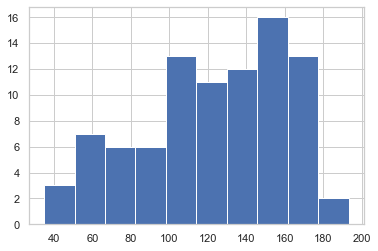

In [109]:
plt.hist(score["total"])

In [118]:
# 2개의 히스토그램 겹쳐 그리기

ftotal = score.loc[score["gender"] == "f", "total"]
mtotal = score.loc[score.gender == "m", "total"]

In [119]:
args = dict(alpha=0.5, bins=10)

(array([1., 1., 2., 1., 5., 5., 5., 3., 7., 5.]),
 array([ 35. ,  48.7,  62.4,  76.1,  89.8, 103.5, 117.2, 130.9, 144.6,
        158.3, 172. ]),
 <BarContainer object of 10 artists>)

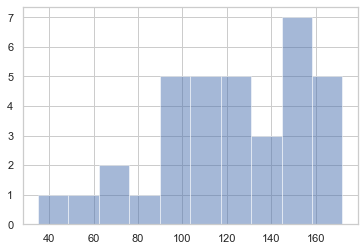

In [121]:
plt.hist(ftotal, **args, color="b", label="female")

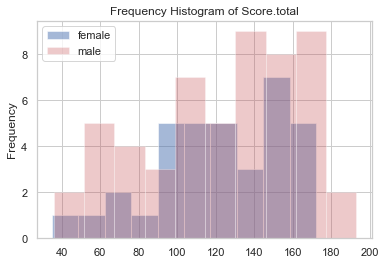

In [131]:
plt.hist(ftotal, **args, color="b", label="female")
plt.hist(mtotal, alpha=0.3, bins=10, color="r", label = "male")

plt.gca().set(title="Frequency Histogram of Score.total", ylabel="Frequency")
plt.legend()
plt.show()

In [135]:
### Python 4.1 빈도표 및 분할표 (1)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
enqete = pd.read_csv("C:\\data\\enqete.csv")
enqete.head(3)

,college,grade,q1,q2
0,med,1,1.0,1
1,med,1,1.0,1
2,med,1,1.0,1


In [141]:
enqete_table = pd.crosstab(index=enqete["grade"], colnames=["Grade"], columns="count")

In [144]:
enqete_table

Grade,count
grade,
1,103
2,103
3,100
4,94


In [146]:
enqete_table.index = ["1학년", "2학년", "3학년", "4학년"]
enqete_table

Grade,count
1학년,103
2학년,103
3학년,100
4학년,94


In [147]:
### Python 4.2  빈도표 및 분할표 (2)

import pandas as pd
import numpy as np

In [149]:
grade_q1 = pd.crosstab(index=enqete["grade"], columns=enqete["q1"])
grade_q1.index = ["1학년", "2학년", "3학년", "4학년"]
grade_q1

q1,0.0,1.0,2.0
1학년,0,80,23
2학년,0,66,37
3학년,0,55,44
4학년,1,55,38


In [155]:
enqete["q1"] = enqete["q1"].replace(0, np.NaN)

In [157]:
grade_q1 = pd.crosstab(index=enqete["grade"], columns=enqete["q1"])
grade_q1.index = ["1학년", "2학년", "3학년", "4학년"]
grade_q1

q1,1.0,2.0
1학년,80,23
2학년,66,37
3학년,55,44
4학년,55,38


In [158]:
from scipy.stats import chi2_contingency

In [160]:
chi2_contingency(grade_q1)    # 카이제곱검정 : X^2 통계량, p-value, df

(12.402787258488466,
 0.0061233649734963305,
 3,
 array([[66.25125628, 36.74874372],
        [66.25125628, 36.74874372],
        [63.67839196, 35.32160804],
        [59.81909548, 33.18090452]]))

In [161]:
### Python 4.3 막대그림, 원그림, 겹친 막대그림

import pandas as pd
import matplotlib.pyplot as plt

In [165]:
enqete = pd.read_csv("C:\\data\\enqete.csv")
enqete_table = pd.crosstab(index=enqete["grade"], colnames=["Grade"], columns="count")
enqete_table.index = ["Gr1", "Gr2", "Gr3", "Gr4"]
enqete_table.head(3)

Grade,count
Gr1,103
Gr2,103
Gr3,100


<BarContainer object of 4 artists>

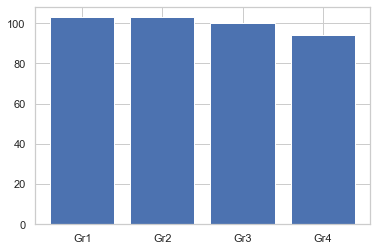

In [166]:
# matplotlib를 이용한 바 그래프
plt.bar(enqete_table.index, enqete_table["count"])

([<matplotlib.patches.Wedge at 0x1ac235805b0>,
 [Text(-0.795926740046034, 0.7592763821426907, 'Gr1'),
  Text(-0.7209402440089244, -0.83080994491421, 'Gr2'),
  Text(0.8475645040313471, -0.7011664649040888, 'Gr3'),
  Text(0.7403138395114514, 0.8135941365495534, 'Gr4')])

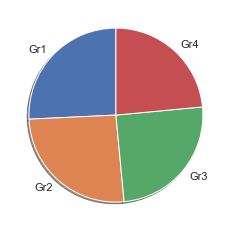

In [169]:
# matplotlib를 이용한 파이 그래프
plt.pie(enqete_table["count"], labels=enqete_table.index, shadow=True, startangle=90)

In [171]:
# matplotlib를 이용한 겹침 바 그래프

grade_q1.index = ["Gr1", "Gr2", "Gr3" "Gr4"]
grade_q1.plo t.bar(stacked=True)
plt.legend(title="Question1")
plt.show()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [7]:
# 교재 8장 연습문제 4번
### statscore.csv 파일 불러오기
import numpy as np
import pandas as pd

statscore = pd.read_csv("C:/data/statscore.csv")
statscore.head(10)

,major,midterm,final
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [26]:
### 중간고사, 기말고사 성적에 대한 기술통계량
statscore.describe()

,midterm,final
count,20.000000,20.000000
mean,65.150000,75.650000
std,19.647619,15.597824
min,31.000000,40.000000
25%,48.500000,66.000000
50%,67.500000,79.000000
75%,78.500000,85.250000
max,94.000000,96.000000


In [46]:
### 각 전공별 중간고사 기술통계량
ss_mmd = statscore.groupby("major")["midterm"].describe()
ss_mmd

,count,mean,std,min,25%,50%,75%,max
major,,,,,,,,
COMP,8.0,65.625000,18.423103,31.0,58.0,70.5,77.0,87.0
STAT,12.0,64.833333,21.225342,34.0,47.0,67.5,80.5,94.0


In [45]:
### 각 전공별 기말고사 기술통계량
ss_mfd = statscore.groupby("major")["final"].describe()
ss_mfd

,count,mean,std,min,25%,50%,75%,max
major,,,,,,,,
COMP,8.0,74.875000,18.795421,40.0,65.25,81.5,86.25,96.0
STAT,12.0,76.166667,13.953386,53.0,67.50,78.5,85.25,95.0


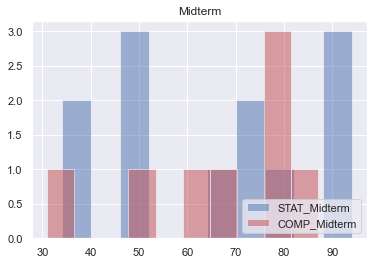

In [66]:
### 각 전공별 중간고사 히스토그램
import matplotlib.pyplot as plt
import seaborn as sns

### 각 전공별 중간고사, 기말고사 값 추출
STAT_M = statscore.loc[statscore.major == "STAT", "midterm"]
COMP_M = statscore.loc[statscore["major"] == "COMP", "midterm"]
STAT_F = statscore.loc[statscore.major == "STAT", "final"]
COMP_F = statscore.loc[statscore["major"] == "COMP", "final"]

### 히스토그램 2개 겹쳐 그리기
args = dict(alpha=0.5, bins=10)

plt.hist(STAT_M, **args, color="b", label="STAT_Midterm")
plt.hist(COMP_M, alpha=0.5, bins=10, color="r", label="COMP_Midterm")
plt.gca().set(title='Midterm')
plt.legend(loc="lower right")
plt.show()

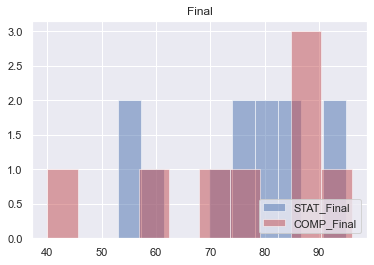

In [67]:
### 각 전공별 기말고사 히스토그램

### 히스토그램 2개 겹쳐 그리기
args = dict(alpha=0.5, bins=10)

plt.hist(STAT_F, **args, color="b", label="STAT_Final")
plt.hist(COMP_F, alpha=0.5, bins=10, color="r", label="COMP_Final")
plt.gca().set(title='Final')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'COMP_Midterm')

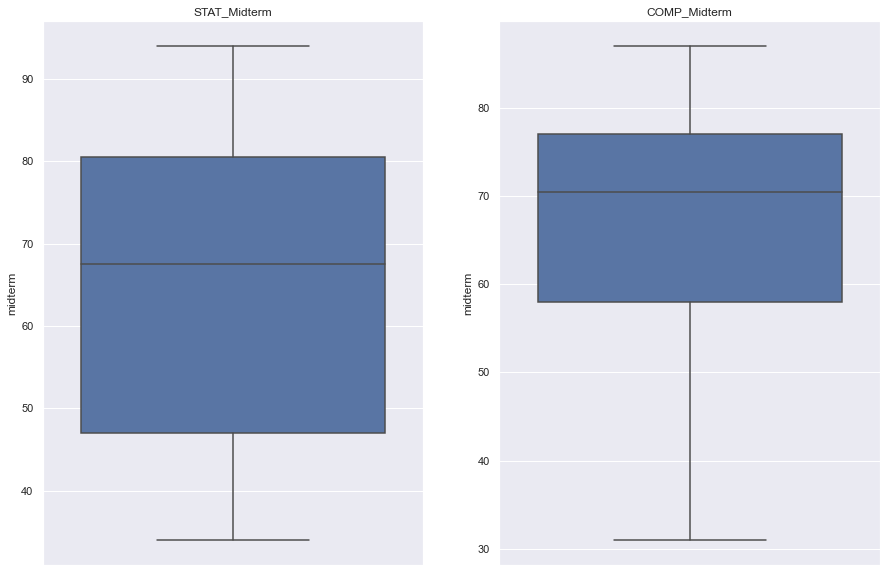

In [79]:
### 각 전공별 중간고사 상자 그림

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(15,10))

a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.boxplot(y="midterm", data=statscore[statscore.major == "STAT"], ax=a1).set_title("STAT_Midterm")
sns.boxplot(y="midterm", data=statscore[statscore.major == "COMP"], ax=a2).set_title("COMP_Midterm")

Text(0.5, 1.0, 'COMP_Final')

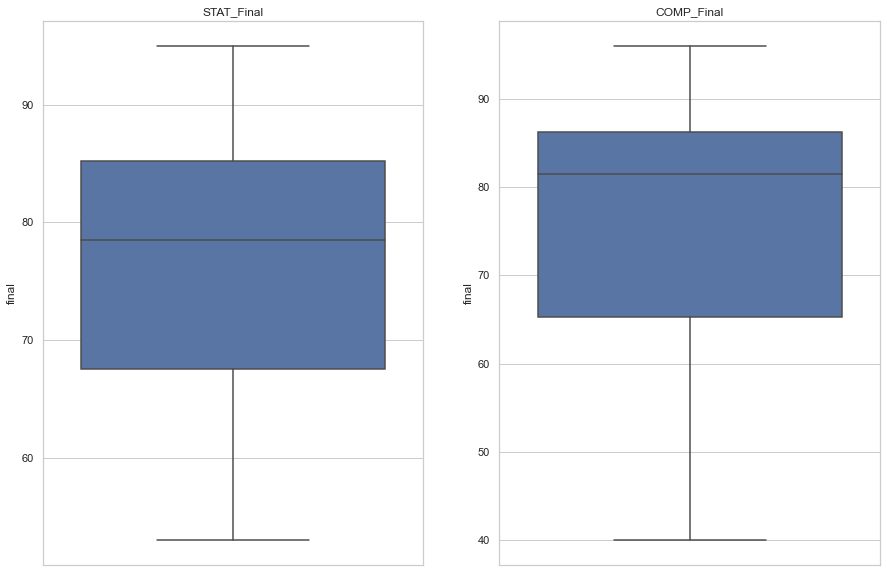

In [80]:
### 각 전공별 기말고사 상자 그림

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(15,10))

a1 = fig.add_subplot(1,2,1)
a2 = fig.add_subplot(1,2,2)

sns.boxplot(y="final", data=statscore[statscore.major == "STAT"], ax=a1).set_title("STAT_Final")
sns.boxplot(y="final", data=statscore[statscore.major == "COMP"], ax=a2).set_title("COMP_Final")

(<Figure size 540x162 with 1 Axes>, <Axes:>)

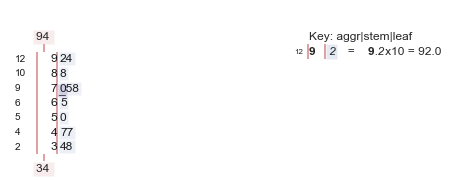

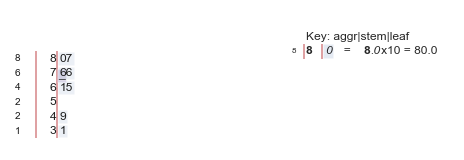

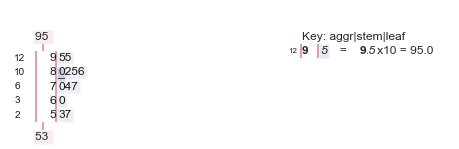

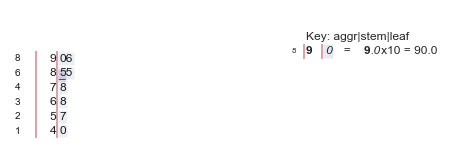

In [83]:
### 각 전공별 중간고사, 기말고사 줄기-잎 그림
import stemgraphic

stemgraphic.stem_graphic(STAT_M, scale=10)  # 중간고사 - STAT 과목
stemgraphic.stem_graphic(COMP_M, scale=10)  # 중간고사 - COMP 과목
stemgraphic.stem_graphic(STAT_F, scale=10)  # 기말고사 - STAT 과목
stemgraphic.stem_graphic(COMP_F, scale=10)  # 기말고사 - COMP 과목